In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
rapido = pd.read_csv('Bookings.csv', sep=',')
rapido

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,7/26/2024,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,7/25/2024,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,7/30/2024,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,7/22/2024,3:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,7/2/2024,9:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20402,7/27/2024,19:46:00,CNR9637947510,Canceled by Customer,CID868443,Prime SUV,Richmond Town,Whitefield,NaN,NaN,AC is Not working,NaN,NaN,NaN,303,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/9983/99...
20403,7/18/2024,5:38:00,CNR4070839222,Success,CID902638,Mini,HSR Layout,Tumkur Road,175.0,60.0,NaN,NaN,No,NaN,412,Cash,16,3.3,3.6,https://cdn-icons-png.flaticon.com/128/3202/32...
20404,7/25/2024,12:38:00,CNR2768163393,Success,CID214557,eBike,Electronic City,MG Road,210.0,105.0,NaN,NaN,No,NaN,2184,Cash,21,3.9,3.0,https://cdn-icons-png.flaticon.com/128/6839/68...
20405,7/21/2024,7:58:00,CNR7143313454,Success,CID110375,Prime SUV,Cox Town,BTM Layout,294.0,90.0,NaN,NaN,No,NaN,283,UPI,6,4.2,4.7,https://cdn-icons-png.flaticon.com/128/9983/99...


In [3]:
rapido = rapido.rename(columns={'Date' : 'date',
                                'Time' : 'time', 
                                'Booking_ID' : 'booking_id',
                                'Booking_Status' : 'booking_status',
                                'Customer_ID' : 'cust_id',
                                'Vehicle_Type' : 'vehicle',
                                'Pickup_Location' : 'pickup',
                                'Drop_Location' : 'drop',
                                'V_TAT' : 'vtat',
                                'C_TAT' : 'ctat',
                                'Canceled_Rides_by_Customer' : 'canceled_by_cust',
                                'Canceled_Rides_by_Driver' : 'canceled_by_driver',
                                'Incomplete_Rides' : 'incomplete',
                                'Incomplete_Rides_Reason' : 'reason',
                                'Booking_Value' : 'value',
                                'Payment_Method' : 'payment',
                                'Ride_Distance' : 'dist',
                                'Driver_Ratings' : 'driver_rate',
                                'Customer_Rating' : 'cust_rate',
                                'Vehicle Images' : 'image'})
                                

In [4]:
rapido.drop(columns='image')

,date,time,booking_id,booking_status,cust_id,vehicle,pickup,drop,vtat,ctat,canceled_by_cust,canceled_by_driver,incomplete,reason,value,payment,dist,driver_rate,cust_rate
0,7/26/2024,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN
1,7/25/2024,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0
2,7/30/2024,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8
3,7/22/2024,3:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN
4,7/2/2024,9:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20402,7/27/2024,19:46:00,CNR9637947510,Canceled by Customer,CID868443,Prime SUV,Richmond Town,Whitefield,NaN,NaN,AC is Not working,NaN,NaN,NaN,303,NaN,0,NaN,NaN
20403,7/18/2024,5:38:00,CNR4070839222,Success,CID902638,Mini,HSR Layout,Tumkur Road,175.0,60.0,NaN,NaN,No,NaN,412,Cash,16,3.3,3.6
20404,7/25/2024,12:38:00,CNR2768163393,Success,CID214557,eBike,Electronic City,MG Road,210.0,105.0,NaN,NaN,No,NaN,2184,Cash,21,3.9,3.0
20405,7/21/2024,7:58:00,CNR7143313454,Success,CID110375,Prime SUV,Cox Town,BTM Layout,294.0,90.0,NaN,NaN,No,NaN,283,UPI,6,4.2,4.7


## 📊 1️⃣ Booking Overview Visuals


### Q1. What is the distribution of booking status?


<Axes: ylabel='booking_status'>

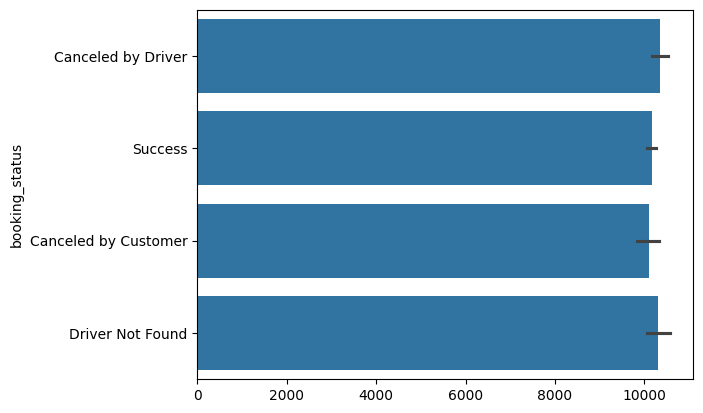

In [5]:
sns.barplot(rapido['booking_status'])

### Q2. How do bookings vary by vehicle type?

<Axes: xlabel='vehicle', ylabel='count'>

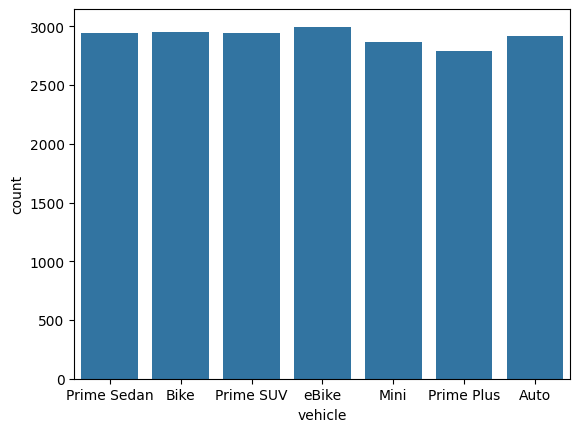

In [6]:
sns.countplot(data=rapido, x='vehicle')

### Q3. What is the hourly booking trend?


In [7]:
rapido['hour'] = pd.to_datetime(rapido['time']).dt.hour
rapido['hour'].value_counts().sort_values(ascending=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_22000\2453909616.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rapido['hour'] = pd.to_datetime(rapido['time']).dt.hour


hour
10    906
8     893
9     874
7     867
4     864
3     862
6     860
11    859
13    857
15    855
18    855
23    852
17    848
21    847
12    846
0     845
22    844
1     839
20    838
19    830
2     829
16    824
14    813
5     800
Name: count, dtype: int64

<Axes: xlabel='hour'>

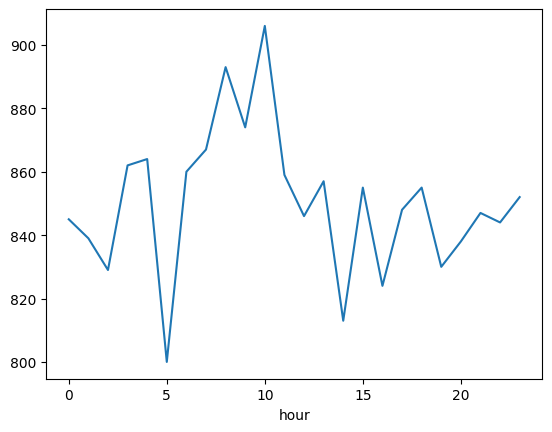

In [8]:
hourly = rapido['hour'].value_counts().sort_index()
sns.lineplot(x=hourly.index, y=hourly.values)

### Q4. What is the daily booking trend (if date exists)?


In [9]:
rapido['date'] = pd.to_datetime(rapido['date']).dt.date

In [10]:
daily = rapido.groupby('date').size().reset_index(name='Total_Bookings')

<Axes: xlabel='date', ylabel='Total_Bookings'>

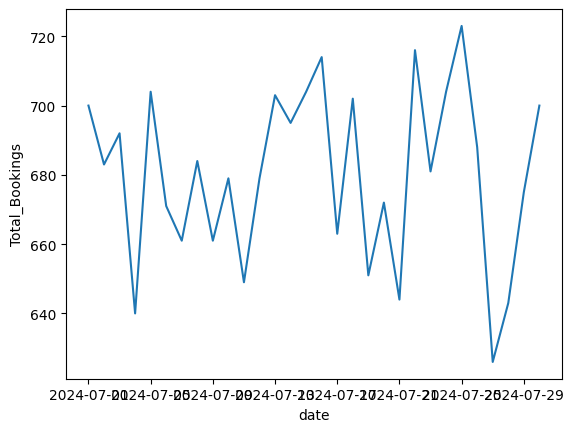

In [11]:
sns.lineplot(data=daily, x='date', y='Total_Bookings')

### Q5. Cancellation rate by vehicle type


In [12]:
cancel = rapido[rapido['booking_status'] != 'Success']
cancel_vehicle = cancel.groupby('vehicle').size()
total_vehicle = rapido.groupby('vehicle').size()
cancel_rate = (cancel_vehicle / total_vehicle * 100).reset_index()
cancel_rate.columns = ['vehicle','Cancellation_Rate']

<Axes: xlabel='vehicle', ylabel='Cancellation_Rate'>

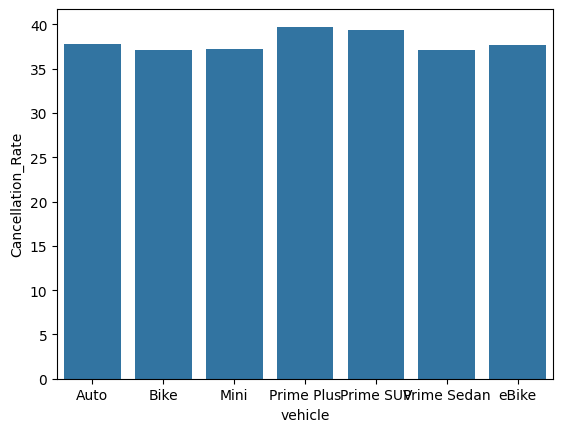

In [13]:
sns.barplot(data=cancel_rate, x='vehicle', y='Cancellation_Rate')

### Q6. Top pickup locations with highest cancellations

In [14]:
fail = rapido[rapido['booking_status']!='Success']

<Axes: ylabel='pickup'>

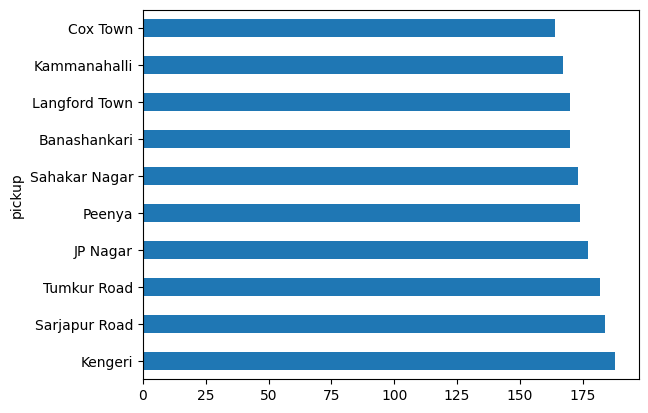

In [16]:
fail['pickup'].value_counts().head(10).plot(kind='barh')

### Q7. Cancellation rate by hour of day

<Axes: xlabel='hour'>

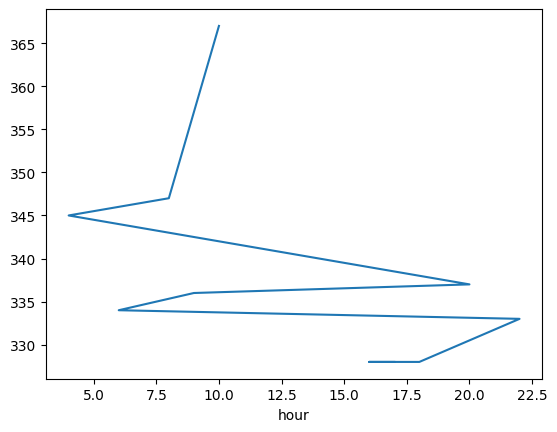

In [18]:
fail['hour'].value_counts().head(10).plot(kind='line')

### Q8. Distribution of V_TAT

<Axes: xlabel='vtat', ylabel='Count'>

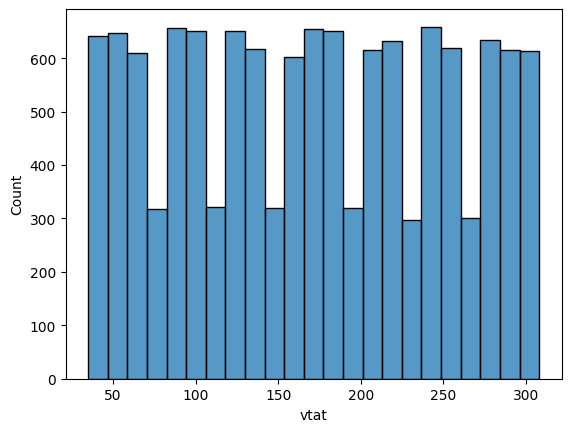

In [20]:
sns.histplot(data=rapido, x='vtat')

### Q9. Distribution of C_TAT

<Axes: xlabel='ctat', ylabel='Count'>

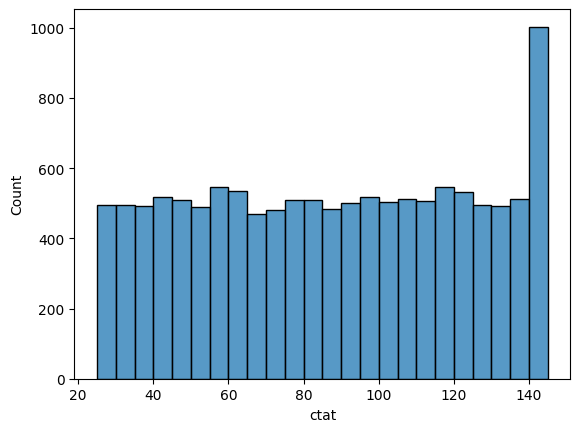

In [21]:
sns.histplot(data=rapido, x='ctat')

### Q10. V_TAT by vehicle type

<Axes: xlabel='vehicle', ylabel='vtat'>

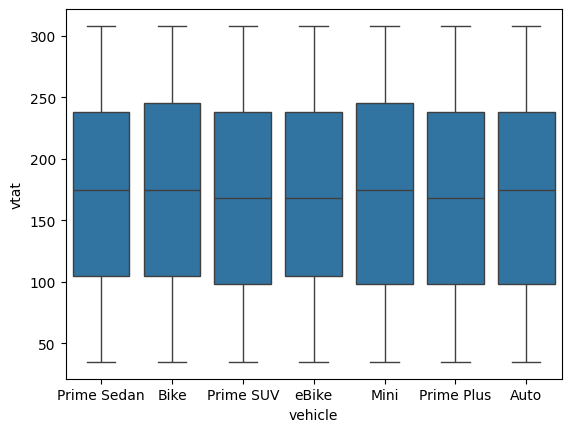

In [22]:
sns.boxplot(data=rapido, x='vehicle', y='vtat')

### Q11. V_TAT vs Booking Status

<Axes: xlabel='booking_status', ylabel='vehicle'>

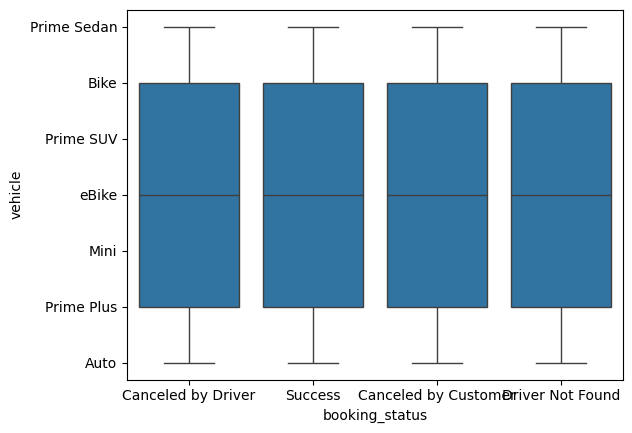

In [24]:
sns.boxplot(data=rapido, y='vehicle', x='booking_status')

### Q12. TAT vs Customer Rating

<Axes: xlabel='vtat', ylabel='ctat'>

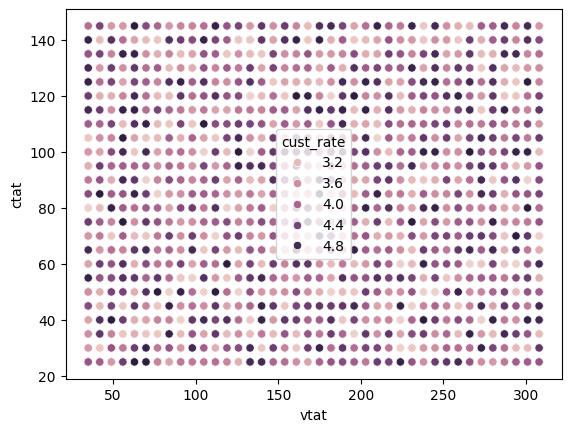

In [29]:
sns.scatterplot(data=rapido, x='vtat', y='ctat', hue='cust_rate')

### Q13. Revenue by vehicle type

In [31]:
successful = rapido[rapido['booking_status']=='Success']

<Axes: ylabel='vehicle'>

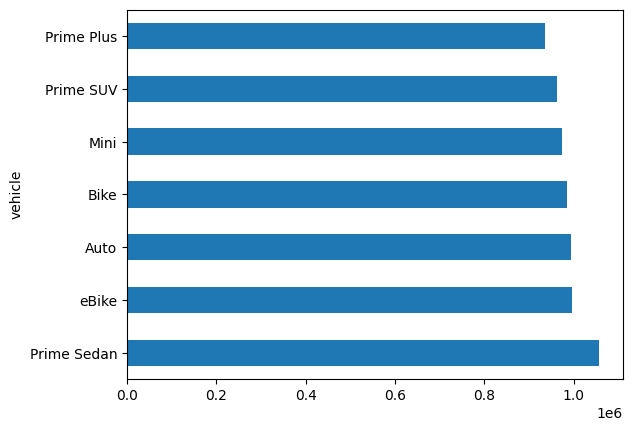

In [32]:
successful.groupby('vehicle')['value'].sum().sort_values(ascending=False).plot(kind='barh')

### Q14. Revenue per ride by vehicle type

<Axes: ylabel='vehicle'>

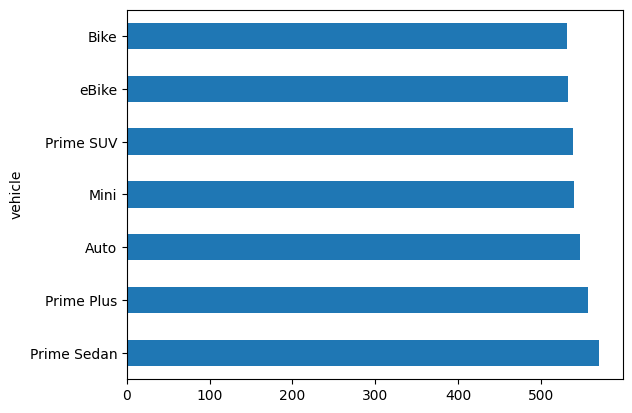

In [33]:
successful.groupby('vehicle')['value'].mean().sort_values(ascending=False).plot(kind='barh')

### Q15. Revenue per KM by vehicle type

C:\Users\HP\AppData\Local\Temp\ipykernel_22000\4169728865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['revenue_per_km'] = successful['value'] / successful['dist']


<Axes: ylabel='vehicle'>

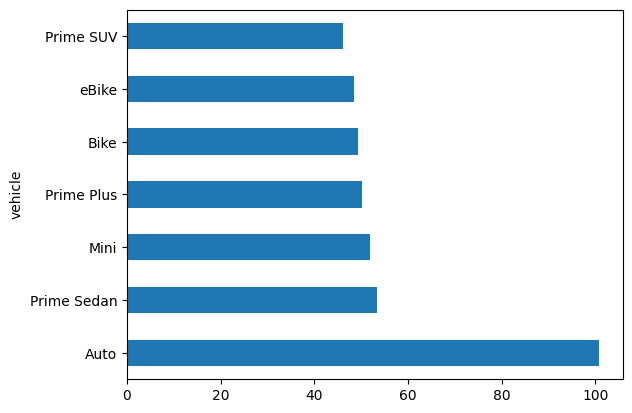

In [35]:
successful['revenue_per_km'] = successful['value'] / successful['dist']
successful.groupby('vehicle')['revenue_per_km'].mean().sort_values(ascending=False).plot(kind='barh')

### Q16. Ride distance distribution by vehicle

<Axes: xlabel='vehicle', ylabel='dist'>

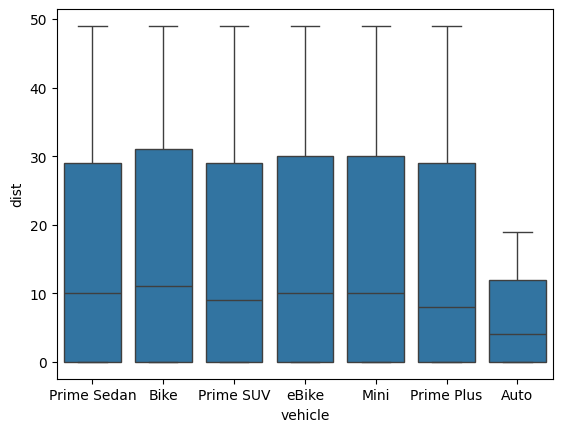

In [37]:
sns.boxplot(data=rapido, y='dist', x='vehicle')

### Q17. Distance vs Booking Value

<Axes: xlabel='dist', ylabel='value'>

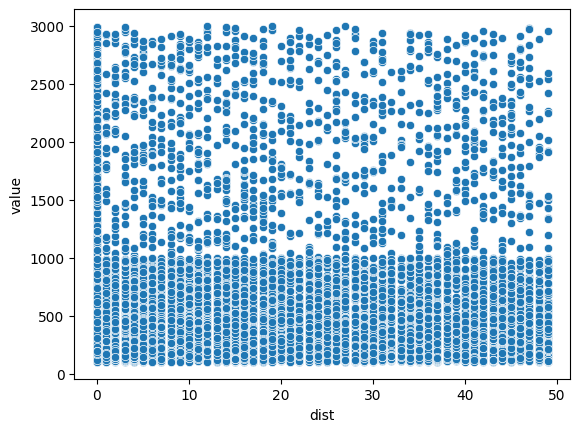

In [38]:
sns.scatterplot(data=rapido, x='dist', y='value')

### Q18. Top 10 pickup locations by demand

<Axes: ylabel='pickup'>

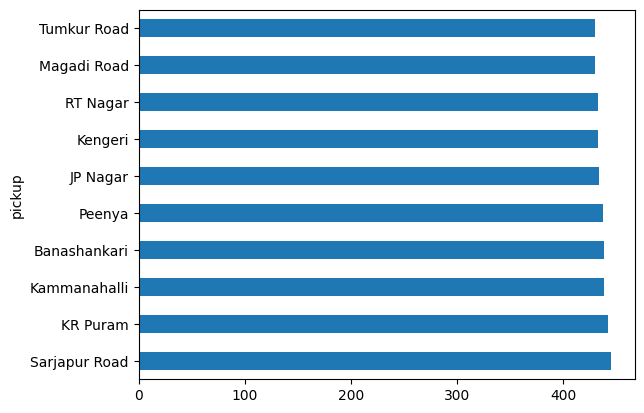

In [41]:
rapido['pickup'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh')

### Q19. Top 10 drop locations

<Axes: ylabel='drop'>

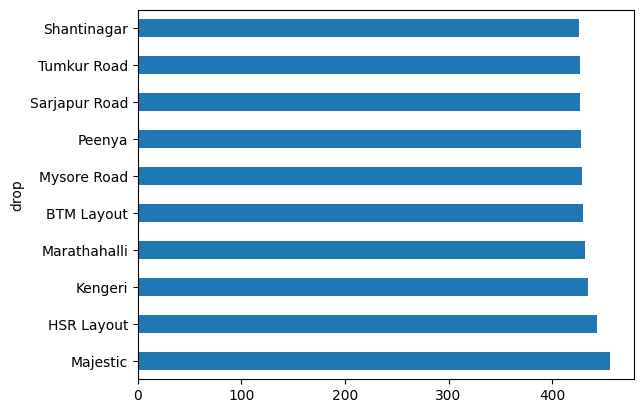

In [42]:
rapido['drop'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh')

### Q20. Revenue by pickup location

<Axes: ylabel='pickup'>

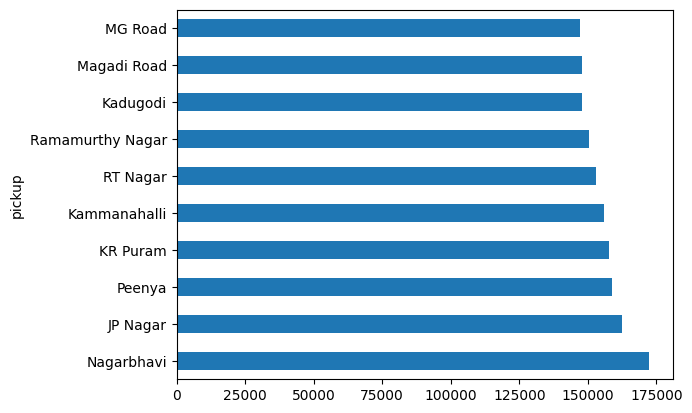

In [45]:
successful.groupby('pickup')['value'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

### Q21. Cancellation rate by pickup location

In [46]:
cancel_location = rapido[rapido['booking_status']!='Success'].groupby('pickup').size()

In [47]:
total_location = rapido.groupby('pickup').size()

<Axes: ylabel='pickup'>

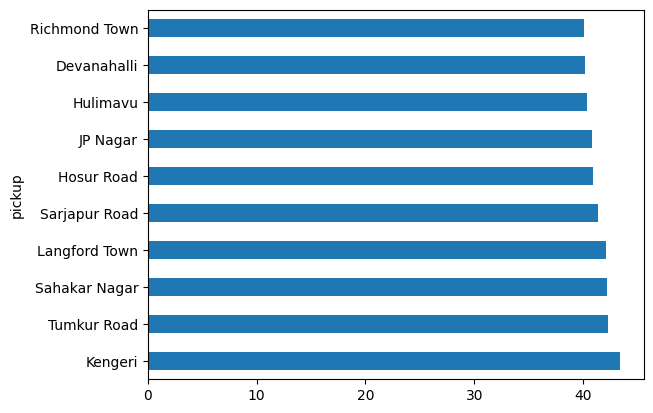

In [49]:
(cancel_location / total_location * 100).sort_values(ascending=False).head(10).plot(kind='barh')

### Q22. Route frequency (Top 10)

In [51]:
rapido['route'] = rapido['pickup'] + '->' + rapido['drop']

<Axes: ylabel='route'>

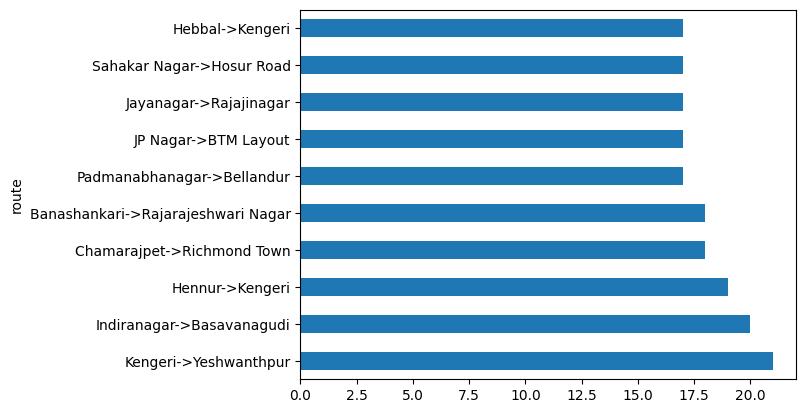

In [55]:
rapido['route'].value_counts().nlargest(10).plot(kind='barh')

### Q23. Payment method distribution

<Axes: ylabel='count'>

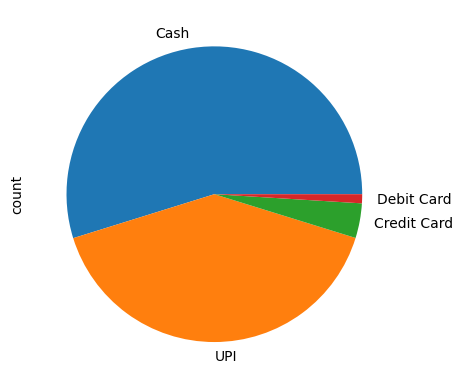

In [58]:
rapido['payment'].value_counts().plot(kind='pie')

### Q24. Revenue by payment method

<Axes: ylabel='payment'>

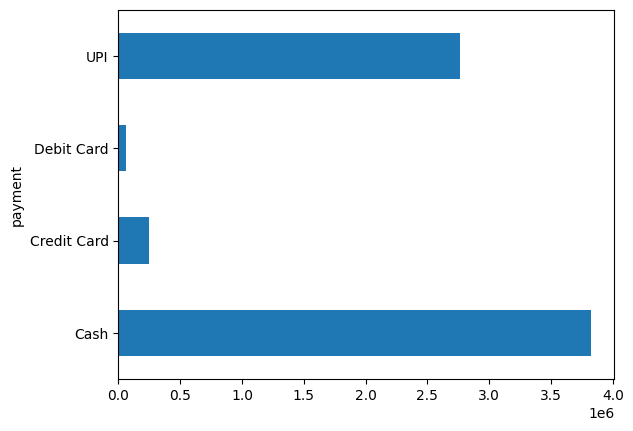

In [59]:
rapido.groupby('payment')['value'].sum().plot(kind='barh')

### Q25. Average booking value by payment method

<Axes: ylabel='payment'>

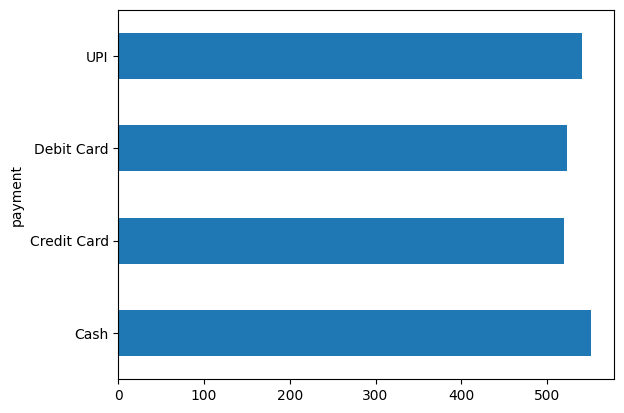

In [60]:
rapido.groupby('payment')['value'].mean().plot(kind='barh')

### Q26. Distribution of customer ratings

<Axes: ylabel='Frequency'>

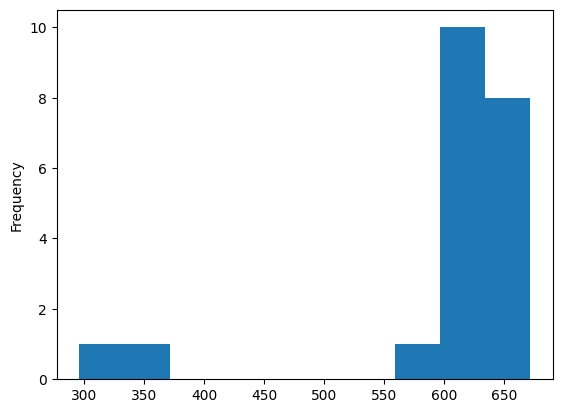

In [61]:
rapido['cust_rate'].value_counts().plot(kind='hist')

### Q27. Distribution of driver ratings

<Axes: ylabel='Frequency'>

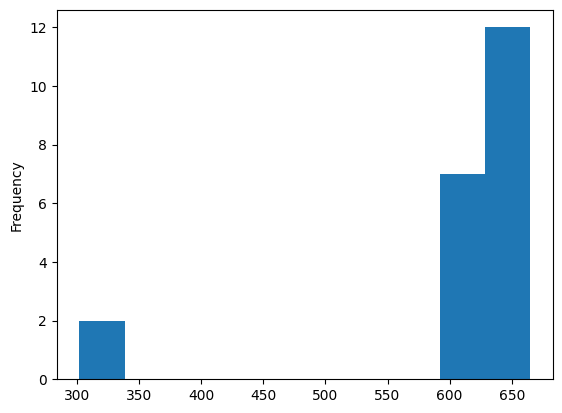

In [62]:
rapido['driver_rate'].value_counts().plot(kind='hist')

### Q28. Ratings by vehicle type

<Axes: ylabel='vehicle'>

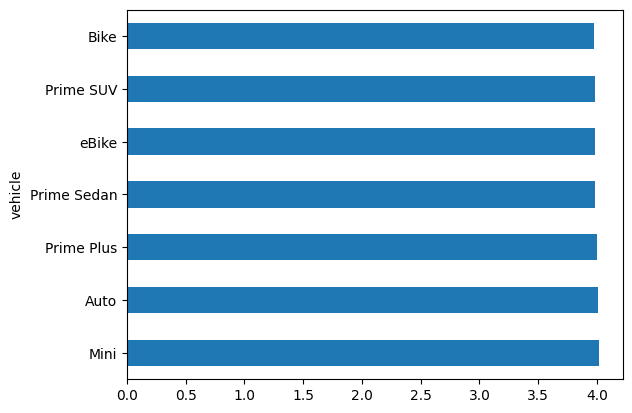

In [63]:
rapido.groupby('vehicle')['cust_rate'].mean().sort_values(ascending=False).plot(kind='barh')

### Q29. Ride distance vs rating

<Axes: xlabel='driver_rate', ylabel='cust_rate'>

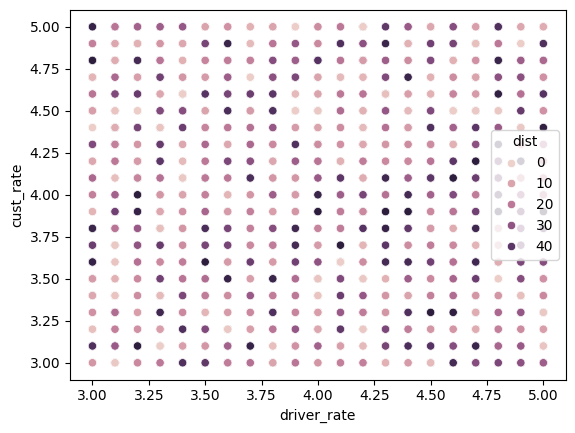

In [69]:
sns.scatterplot(data=rapido, y='cust_rate', x='driver_rate', hue='dist')

### Q30. Revenue vs rating

<Axes: xlabel='value', ylabel='cust_rate'>

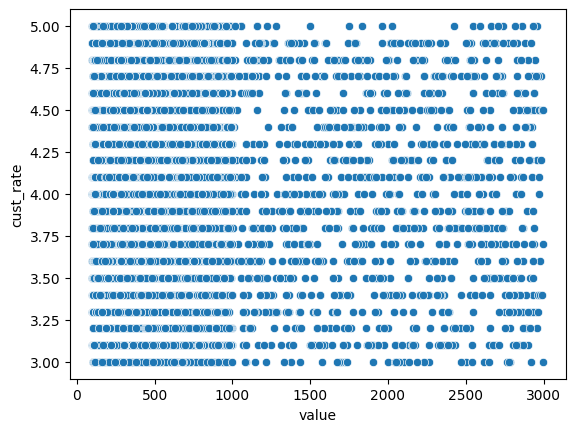

In [72]:
sns.scatterplot(data=rapido, y='cust_rate', x='value')

### Q31. Booking value by hour (surge detection)

In [73]:
successful['hour'] = pd.to_datetime(successful['time']).dt.hour

C:\Users\HP\AppData\Local\Temp\ipykernel_22000\4146795142.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  successful['hour'] = pd.to_datetime(successful['time']).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_22000\4146795142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['hour'] = pd.to_datetime(successful['time']).dt.hour


C:\Users\HP\AppData\Local\Temp\ipykernel_22000\2590714714.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  successful.groupby((pd.cut(successful['hour'], bins=[0,4,8,12,16,20,24], labels=['Late','Early','Peak1','Afternoon','Peak2','LateNight'])))['value'].mean().sort_values(ascending=False).plot(kind='line')


<Axes: xlabel='hour'>

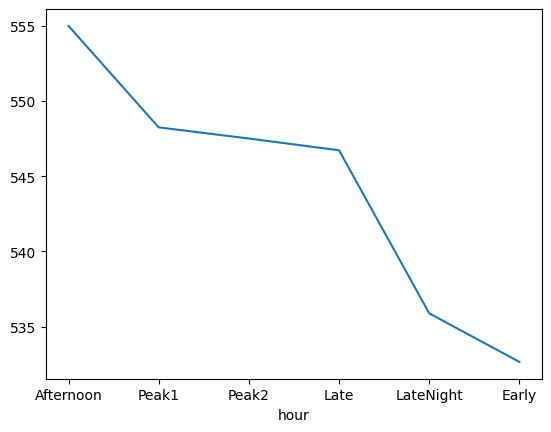

In [74]:
successful.groupby((pd.cut(successful['hour'], bins=[0,4,8,12,16,20,24], labels=['Late','Early','Peak1','Afternoon','Peak2','LateNight'])))['value'].mean().sort_values(ascending=False).plot(kind='line')

### Q32. Heatmap: Hour vs Booking Status

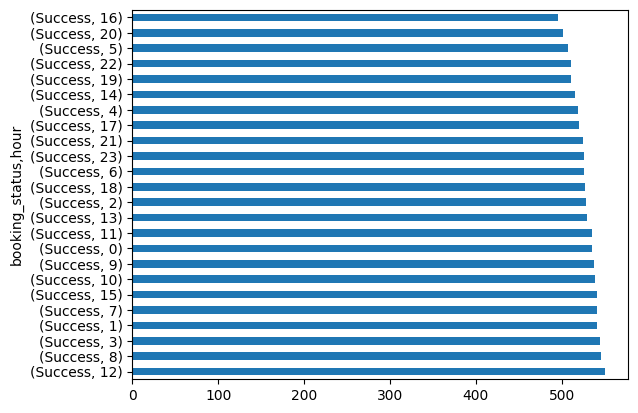

In [88]:
heat = successful.groupby('booking_status')['hour'].value_counts().plot(kind='barh')

### Q33. Correlation heatmap (TAT, Distance, Value, Ratings)

In [89]:
heat = rapido[['ctat','vtat','dist','value','cust_rate','driver_rate']].corr()

<Axes: >

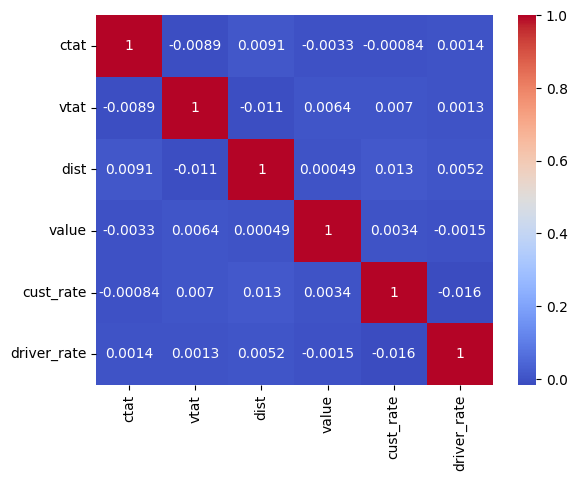

In [90]:
sns.heatmap(data=heat, annot=True, cmap='coolwarm')

### Q34. Vehicle preference vs revenue contribution

In [99]:
hour_stat = pd.crosstab(rapido['hour'], rapido['booking_status'])

<Axes: xlabel='booking_status', ylabel='hour'>

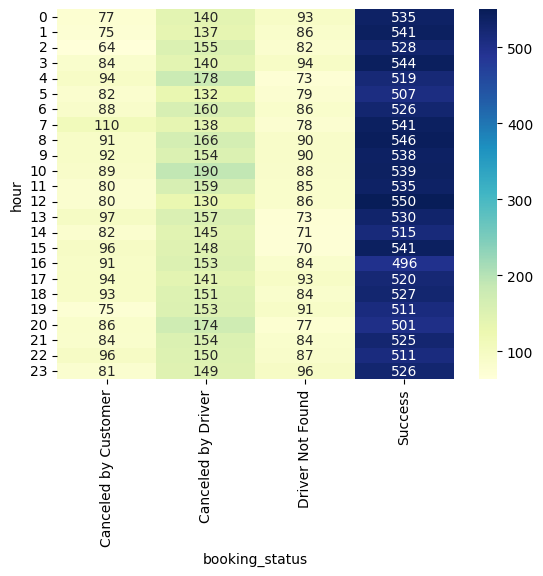

In [100]:
sns.heatmap(data=hour_stat, annot=True, fmt='d', cmap='YlGnBu')

### Q35. Success rate by vehicle type

In [95]:
rapido['is_success'] = (rapido['booking_status']=='Success').astype(int)

<Axes: ylabel='is_success,vehicle'>

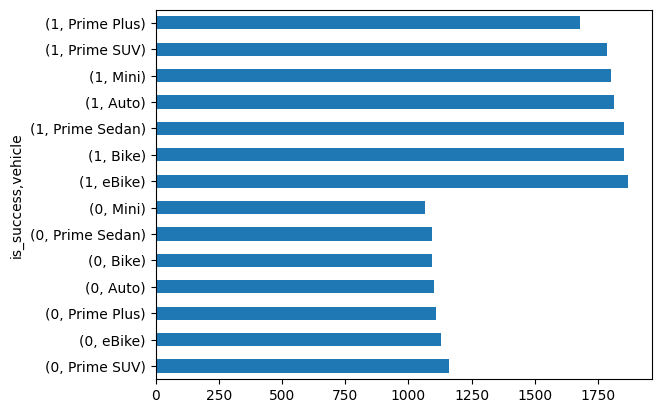

In [98]:
rapido.groupby('is_success')['vehicle'].value_counts().plot(kind='barh')